<a href="https://colab.research.google.com/github/marquesgabi/Doutorado/blob/master/ANN_%20better_resolution/PSD_histogram_CNN_B_r_squared_jun_23_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import sklearn
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from sklearn.metrics import r2_score
from google.colab import files

In [34]:
!pip install mahotas

In [35]:
import mahotas.features.texture as mht
import mahotas.features

In [36]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020
import Go2BlackWhite
import Go2Mahotas

Cloning into 'marquesgabi_fev_2020'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 73 (delta 37), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (73/73), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/marquesgabi_out_2020/marquesgabi_fev_2020


In [37]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip' 
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

Cloning into 'Doutorado'...
remote: Enumerating objects: 369, done.
remote: Counting objects: 100% (119/119), done.
remote: Compressing objects: 100% (118/118), done.
remote: Total 369 (delta 43), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (369/369), 165.41 MiB | 25.67 MiB/s, done.
Resolving deltas: 100% (166/166), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/marquesgabi_out_2020/marquesgabi_fev_2020/Doutorado


In [38]:
labels =[]
with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    labels.append(f)
print(labels)

['Fotos_Grandes-3cdAmostra/Q6-8-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-5-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-8-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-3-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-8-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-3-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-1.jpg', 'Fotos_Grandes-3cdAmostra/Q6-5-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-1.jpg', 'Fotos_Grandes-3cdAmostr

In [39]:
Size=1200 # tamanho da foto
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[4] 
# this is the big image we want to segment 
# ww[0], change it if you want to segment another picture

In [40]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 163, done.
remote: Counting objects: 100% (163/163), done.
remote: Compressing objects: 100% (161/161), done.
remote: Total 163 (delta 65), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (163/163), 211.71 MiB | 22.80 MiB/s, done.
Resolving deltas: 100% (65/65), done.
Checking out files: 100% (46/46), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/marquesgabi_out_2020/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines


In [41]:
from segment_filter_not_conclude import Segmenta  # got image provided segmented

In [42]:
df=Segmenta(img)
Img_Size = 28

In [43]:
print(df)

    Width           0           1  ...         781         782         783
0     151  199.719193  146.160919  ...  149.228317  136.957245  139.731964
1     115  179.223053  179.125656  ...  104.448685   99.339050  122.354996
2     133  121.722992  118.277016  ...  155.318542  157.385040  157.517990
3     160  124.976250  126.253120  ...    0.760000    0.255625    1.380625
4     190    0.316454    0.948698  ...  126.066589  147.544495  177.043655
5     200   72.693596   70.962799  ...    1.542400    0.824800    0.442400
6     199  185.081680  155.313675  ...    1.487134    0.208328    1.288250
7     126  115.111115  113.185181  ...  163.962967  166.432098  170.111115
8     181  137.957947  138.529373  ...   74.995247   80.142487   85.243500
9     172  142.768524  141.323441  ...  192.124954  191.282318  193.135757
10    138   92.088211   92.076447  ...    0.878807    1.849821    1.038227
11    187  237.937408  247.486877  ...  172.297974  123.670273  118.436211
12    182  119.159767  12

In [44]:
'''
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines
# filename = 'model_ANN.pkl'
filename = 'model_ANN_new.pkl'
model = joblib.load(filename)
'''

"\n!git clone https://github.com/ucfilho/MarquesGabi_Routines\n%cd MarquesGabi_Routines\n# filename = 'model_ANN.pkl'\nfilename = 'model_ANN_new.pkl'\nmodel = joblib.load(filename)\n"

In [45]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 163, done.
remote: Counting objects: 100% (163/163), done.
remote: Compressing objects: 100% (161/161), done.
remote: Total 163 (delta 65), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (163/163), 211.71 MiB | 22.71 MiB/s, done.
Resolving deltas: 100% (65/65), done.
Checking out files: 100% (46/46), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/marquesgabi_out_2020/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines


In [46]:
# leitura dos dados
df=pd.read_excel("FotosTreinoRede.xlsx")
y = df['y']
df.drop(['Unnamed: 0','y'], axis='columns', inplace=True)

In [47]:
X =np.array(df.copy())/255.0 


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)

In [48]:
# helper
def ynindicator(Y):
  N = len(Y)
  K = len(set(Y))
  I = np.zeros((N, K))
  I[np.arange(N), Y] = 1
  return I

def yback(Y_test):
  nrow, ncol = Y_test.shape
  y_class = np.zeros(nrow,dtype=int)
  y_resp = Y_test
  for k in range(nrow):
    for kk in range(K):
      if(y_resp[k,kk] == 1):
        y_class[k] = kk
  Y_test = y_class.copy()
  return Y_test

X_train = np.array(X_train)
Y_train = np.array(Y_train)
K = len(set(Y_train))

X_train = X_train.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_train = Y_train.astype(np.int32)
Y_train = ynindicator(Y_train)

X_test = np.array(X_test )
Y_test = np.array(Y_test)
X_test = X_test.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_test = Y_test.astype(np.int32)
Y_test = ynindicator(Y_test)

# the model will be a sequence of layers

Description = '3 layers of Convolution: 32, 64, 128 '
N1 = 200
N2 = 10

# make the CNN
model = Sequential()
model.add(Conv2D(input_shape=(Img_Size, Img_Size, 1), filters=32, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=64, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=128, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(units=N1))
model.add(Dropout(0.2))
model.add(Dense(units=N2))
model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Dense(units=K))
model.add(Activation('softmax'))


# list of losses: https://keras.io/losses/
# list of optimizers: https://keras.io/optimizers/
# list of metrics: https://keras.io/metrics/
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [49]:

# training the model
r = model.fit(X_train, Y_train, validation_data=(X_test,Y_test), 
              epochs=200, batch_size=32)

Epoch 1/200
11/11 [==============================] - 3s 125ms/step - loss: 0.5920 - accuracy: 0.6467 - val_loss: 0.6930 - val_accuracy: 0.5102
Epoch 2/200
11/11 [==============================] - 1s 50ms/step - loss: 0.2754 - accuracy: 0.8995 - val_loss: 0.6929 - val_accuracy: 0.5102
Epoch 3/200
11/11 [==============================] - 1s 50ms/step - loss: 0.1614 - accuracy: 0.9413 - val_loss: 0.6931 - val_accuracy: 0.5102
Epoch 4/200
11/11 [==============================] - 1s 49ms/step - loss: 0.1342 - accuracy: 0.9544 - val_loss: 0.6929 - val_accuracy: 0.5102
Epoch 5/200
11/11 [==============================] - 1s 52ms/step - loss: 0.0973 - accuracy: 0.9510 - val_loss: 0.6935 - val_accuracy: 0.5102
Epoch 6/200
11/11 [==============================] - 1s 50ms/step - loss: 0.0664 - accuracy: 0.9667 - val_loss: 0.6929 - val_accuracy: 0.5102
Epoch 7/200
11/11 [==============================] - 1s 51ms/step - loss: 0.0901 - accuracy: 0.9722 - val_loss: 0.6930 - val_accuracy: 0.5102
Epoch

In [50]:
Y_test = yback(Y_test)

In [51]:
pred_test= model.predict_classes(X_test)

data = {'y_true': Y_test,'y_predict': pred_test}  # este dado esta no formato de dicionario

df = pd.DataFrame(data, columns=['y_true','y_predict'])


confusion_matrix = pd.crosstab(df['y_true'], df['y_predict'], rownames=['Actual'], colnames=['Predict'])
print(confusion_matrix)

y_true = df['y_true']
y_pred = df['y_predict']

  
METRICS=sklearn.metrics.classification_report(y_true, y_pred)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Predict   0   1
Actual         
0        33  39
1         0  75


In [52]:
pred_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1])

In [53]:
cont = 0; num =25
img_graos = []
Width_new = []
img=ww[4] 
while( cont < num):
  df=Segmenta(img)
  df_ann =df.copy()
  Width = df['Width']
  del df_ann['Width']
  result = np.array(df_ann)
  result = result.reshape(-1, Img_Size, Img_Size, 1) / 255.0
  prediction = model.predict_classes(result)
  loc_grao =[];k=0
  for i in prediction:
    if( i == 0):
      img_graos.append(df.iloc[k,:])
      Width_new.append(Width.iloc[k])
      cont = cont + 1
    k = k +1
img_graos = pd.DataFrame(img_graos)
print(img_graos)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


    Width           0           1  ...         781         782         783
0   158.0   28.232012  121.817329  ...    0.727608    0.271912    1.385836
1   174.0   90.534409   91.254990  ...    1.052187    0.163430    1.347734
2   136.0  124.560555  131.627167  ...    8.750000   18.241348   53.448097
3   184.0  129.102554  111.531662  ...    1.297259    0.159735    1.340737
4   158.0   31.226887   77.234901  ...    0.727608    0.271912    1.385836
5   192.0  178.493057  176.296432  ...  253.065948  253.609787  253.085480
6   103.0  155.724945  161.071533  ...    1.000000    1.000000    1.000000
7   195.0  121.574524  109.282089  ...    1.456621    0.220934    1.328416
8   119.0  130.927338  135.522491  ...  161.107285  149.609009  141.941193
9   127.0  165.476105  177.337585  ...  139.719818  140.990891  147.968384
10  148.0  155.099350  144.219879  ...  135.805710  142.177505  107.492340
11  106.0   90.534363   96.389816  ...  138.467789  142.205414  147.387344
12  194.0  218.067368  22

In [54]:
Width=np.array(Width_new)

In [55]:
!git clone https://github.com/ucfilho/marquesgabi_paper_fev_2021
%cd marquesgabi_paper_fev_2021

from Get_PSDArea_New import PSDArea
from histogram_fev_2021 import PSD
from GetBetterSegm import GetBetter

Cloning into 'marquesgabi_paper_fev_2021'...
remote: Enumerating objects: 671, done.
remote: Counting objects: 100% (432/432), done.
remote: Compressing objects: 100% (430/430), done.
remote: Total 671 (delta 270), reused 0 (delta 0), pack-reused 239
Receiving objects: 100% (671/671), 5.50 MiB | 2.86 MiB/s, done.
Resolving deltas: 100% (407/407), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/marquesgabi_out_2020/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021


In [56]:
!git clone https://github.com/ucfilho/marquesgabi_out_2020
%cd marquesgabi_out_2020
PSD_imageJ = 'Areas_ImageJ.csv'
PSD_new = pd.read_csv(PSD_imageJ)
print(PSD_new.head(3))

Cloning into 'marquesgabi_out_2020'...
remote: Enumerating objects: 146, done.
remote: Counting objects: 100% (146/146), done.
remote: Compressing objects: 100% (142/142), done.
remote: Total 146 (delta 75), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (146/146), 1.00 MiB | 5.87 MiB/s, done.
Resolving deltas: 100% (75/75), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/marquesgabi_out_2020/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/marquesgabi_out_2020
   Juntas   Area
0       1  2.001
1       2  0.820
2       3  1.270


In [57]:
PSD_new.shape

(95, 2)

In [58]:
Area_All, Diameter_All=PSDArea(img_graos) 

In [59]:
img_graos.head()

,Width,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,158.0,28.232012,121.817329,139.675064,146.120819,148.306992,147.905792,151.324936,152.295944,148.062653,129.607590,84.703415,70.042305,80.429100,82.243881,81.603592,87.127060,93.061203,71.080750,22.560328,0.924371,1.153020,1.317417,0.203493,0.858516,1.789937,0.747797,0.292101,1.406025,57.547188,131.463211,133.110077,137.784317,137.296280,147.643951,153.738007,161.010590,158.002411,154.461624,142.755325,...,161.776154,100.543983,31.520428,2.140843,0.997116,0.819260,0.417722,0.605512,1.385836,0.727608,0.271912,1.385836,132.490295,115.829834,117.912354,123.169205,119.728882,115.156868,115.815735,117.344337,118.057198,123.815254,130.477173,130.748901,140.625702,150.308762,162.332794,167.326889,113.665916,43.258293,45.099983,9.518827,1.615286,0.939433,0.199167,0.683704,1.385836,0.727608,0.271912,1.385836
1,174.0,90.534409,91.254990,91.918739,90.531517,91.883476,89.884270,91.167397,91.032639,135.747269,218.951675,229.710297,243.563370,250.800262,249.257126,237.517807,149.055634,62.579342,83.527153,87.233337,21.510241,2.570088,2.637204,0.730083,0.376272,1.571674,1.060906,0.171357,1.353283,80.669983,92.918625,95.249443,92.882950,88.841599,87.782539,84.280365,80.776596,85.542480,202.621887,248.951935,...,0.289867,0.850311,1.685956,0.508257,0.600211,1.707095,0.737218,0.381821,1.577223,1.069626,0.179284,1.358832,0.192364,0.988770,1.600608,0.405205,0.682917,1.345885,1.000000,1.000000,1.000000,0.375875,0.042674,0.827454,1.255780,0.086273,1.221298,1.474171,0.278769,0.829700,1.673273,0.497159,0.589114,1.688070,0.722949,0.370723,1.566125,1.052187,0.163430,1.347734
2,136.0,124.560555,131.627167,137.104675,152.467133,166.414352,178.687714,185.121979,203.269043,214.232712,214.366791,208.192047,201.141861,189.114197,183.314026,175.264709,167.779434,163.721451,169.032867,181.465393,184.796722,185.301041,184.463669,175.578720,131.026825,124.214539,126.602081,129.179932,133.179932,126.865059,132.371979,132.327866,154.598618,176.476654,182.518158,190.014725,195.701553,208.507782,208.304504,198.651398,...,65.132355,67.583046,68.692909,68.541519,69.921280,76.696373,87.696373,97.551903,70.287201,8.475779,24.070070,70.790649,131.178192,138.854675,135.314026,139.781143,133.823532,132.591705,136.066620,124.618515,78.480972,35.513840,29.832180,27.916956,61.094292,97.500862,81.911766,73.306229,71.598618,69.799309,73.740486,70.987892,69.776825,76.678200,86.326126,98.121117,72.234428,8.750000,18.241348,53.448097
3,184.0,129.102554,111.531662,102.106796,113.722107,117.895554,124.288269,131.961243,126.043938,121.491478,104.678635,102.974945,113.829849,123.939018,125.893181,129.448486,129.310959,123.436188,117.551979,71.494324,34.326557,4.804348,3.607750,1.271739,0.151701,1.370983,1.284026,0.133270,1.327505,110.815201,58.756138,76.023621,108.926270,115.148865,121.314735,128.162552,131.998093,128.970215,121.431938,121.101593,...,49.508980,45.033077,24.534971,5.786861,2.827977,1.396503,1.244801,0.170132,1.380907,1.293951,0.153119,1.337429,178.250473,175.527863,168.433365,157.827026,148.733932,146.551025,146.446121,132.980148,109.321831,103.865311,97.106796,113.984390,125.837891,107.678627,71.286385,54.701794,46.760872,44.854435,47.551506,33.421074,3.429584,1.414461,1.217391,0.176276,1.384215,1.297259,0.159735,1.340737
4,158.0,31.226887,77.234901,139.781601,145.684189,149.879013,149.437744,147.410660,131.114883,82.905945,48.627781,64.539658,74.658867,83.854347,84.554565,80.461945,87.678413,83.370773,41.462749,5.808524,1.974523,0.637879,1.224323,0.183304,0.829675,1.758212,0.727608,0.271912,1.385836,22.737221,112.406830,141.984787,146.355560,151.526505,150.171921,149.872131,147.834961,139.673141,106.468506,75.508415,...,166.280731,154.242920,80.467712,6.101426,1.036853,1.170165,2.156385,1.5958

In [60]:
Area = np.array(PSD_new['Area'])
diam_teste = []
for A in Area:
  diam_teste.append((4*A/np.pi)**0.5) 

Diam1 = [ (4*A/np.pi)**0.5 for A in Area]

In [61]:
X.shape

(490, 784)

<BarContainer object of 6 artists>

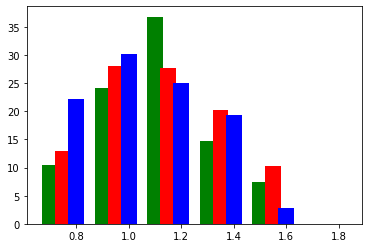

In [62]:
Freq = [10.52631579, 24.21052632, 36.84210526, 14.73684211,  7.36842105, 0.]
Freq2 = [12.90153, 28.11527, 27.66761, 20.21617, 10.34227, 0.]
Freq3 = [22.22489, 30.15078, 25.10463, 19.30926, 2.810434, 0.]
barWidth = 0.25

br1 = range(len(Freq))
# Set position of bar on X axis
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
labels = [0.8, 1.0, 1.2, 1.4, 1.6, 1.8]

xx=[]
for a in labels:
  xx.append(str(a))
plt.bar(br1, Freq , color="green", align="center", width=0.3, tick_label= xx) 
plt.bar(br2, Freq2 , color="red", align="center", width=0.3, tick_label= xx)
plt.bar(br3, Freq3 , color="blue", align="center", width=0.3, tick_label= xx)

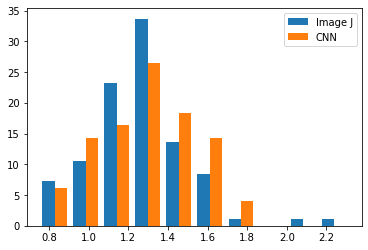

In [64]:
 wt1 = np.ones(len(Diam1)) / len(Diam1)*100
 wt2 = np.ones(len(Diameter_All)) / len(Diameter_All)*100
 X = pd.DataFrame([Diam1,Diameter_All])
 wts = pd.DataFrame([wt1,wt2])
plt.hist(X,weights=wts)
plt.legend(['Image J','CNN'])

(array([[0.07368421, 0.17894737, 0.41052632, 0.74736842, 0.88421053,
         0.96842105, 0.97894737, 0.97894737, 0.98947368, 1.        ],
        [0.06122449, 0.20408163, 0.36734694, 0.63265306, 0.81632653,
         0.95918367, 1.        , 1.        , 1.        , 1.        ]]),
 array([0.7496056 , 0.90638896, 1.06317232, 1.21995568, 1.37673904,
        1.5335224 , 1.69030576, 1.84708911, 2.00387247, 2.16065583,
        2.31743919]),
 <a list of 2 Lists of Patches objects>)

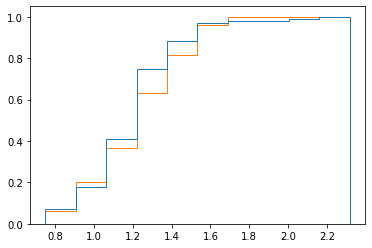

In [65]:
# plt.hist(x, bins=bins, density=True, histtype='step', cumulative=-1,label='Reversed emp.')
plt.hist(X, density=True, histtype='step', cumulative=True,label='Reversed emp.')

r_squared = 0.9817900676482314


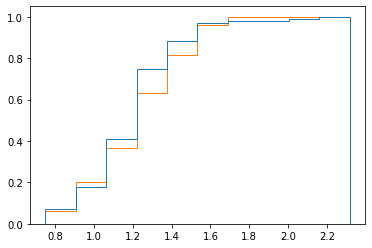

In [66]:
Obj = plt.hist(X, density=True, histtype='step', cumulative=True,label='Reversed emp.')
Y1, Y2 = Obj[0]
Rsquared = r2_score(Y1, Y2)
print('r_squared =',Rsquared)

In [67]:
acc_train = r.history['accuracy'][-1]
acc_test = r.history['val_accuracy'][-1]
loss_train = r.history['loss'][-1]
loss_test = r.history['val_loss'][-1]

In [68]:
df = pd.DataFrame({'N1':N1, 'N2':N2,'R^2':Rsquared,
                   'acc train':acc_train,'acc test':acc_test,
                   'loss train':loss_train,'loss test':loss_test,
                   'Details':Description},
                  index= [0])


In [69]:
df

,N1,N2,R^2,acc train,acc test,loss train,loss test,Details
0,200,10,0.98179,1.0,0.734694,0.000014,1.699469,"3 layers of Convolution: 32, 64, 128"


<a list of 2 Lists of Patches objects>
[0.7496056  0.90638896 1.06317232 1.21995568 1.37673904 1.5335224
 1.69030576 1.84708911 2.00387247 2.16065583 2.31743919]
[[ 7.36842105 10.52631579 23.15789474 33.68421053 13.68421053  8.42105263
   1.05263158  0.          1.05263158  1.05263158]
 [ 6.12244898 14.28571429 16.32653061 26.53061224 18.36734694 14.28571429
   4.08163265  0.          0.          0.        ]]


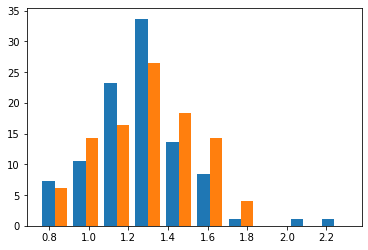

In [70]:
counts, bins, bars = plt.hist(X,weights=wts)
print(bars)
print(bins)
print(counts)

In [ ]:
print(counts.sum())

In [ ]:

plt.hist([Diam1,Diameter_All])
plt.legend(['Image J','CNN'])


In [ ]:
[Diam1,Diameter_All]

In [ ]:
 bins_list = [0.8, 1.0, 1.2, 1.4,1.6, 1.8,2.0]
 wt1 = np.ones(len(Diam1)) / len(Diam1)*100
 wt2 = np.ones(len(Diameter_All)) / len(Diameter_All)*100
 X = pd.DataFrame([Diam1,Diameter_All])
 wts = pd.DataFrame([wt1,wt2])
plt.hist(X,weights=wts,bins = bins_list)
plt.legend(['Image J','CNN'])

In [ ]:
yy = plt.hist(X,weights=wts,bins = bins_list)

In [ ]:
yy[0][0]

In [ ]:
bins_list

In [ ]:
k =0
for kk in yy[0][0]:
  name = str(bins_list[k])
  df[name] = yy[0][1][k]
  k = k+1

In [ ]:
df

In [ ]:
Arq = "output.xlsx"
df.to_excel(Arq)
files.download(Arq)